# TTV Retrieval for K2-24 (a sparsely sampled TTV system from *K2*)

In this notebook, we will perform a dynamical retrieval for K2-24. This system is fairly representative of those observed by *K2* (and subsequent follow-up) in that the TTV phase coverage is relatively non-uniform compared to that of the *Kepler* TTV planets. But, as shown by Petigura et al. (2019), we can still place constraints on the masses! First, let's import packages and download data:

In [1]:
%matplotlib inline
import ttvnest
import numpy as np
import pandas as pd

data = []
errs = []
epochs = []

#reading in from Erik Petigura's paper data
fname = 'petigura_times.txt'
df = pd.read_csv(fname, sep = '\t', skiprows = 5, skipfooter = 1, engine = 'python')
arr = np.array(df)
for planet in ['b', 'c']:
    subarr = arr[np.where(arr[:,1] == planet)]
    data.append(np.array(subarr[:,3], dtype = 'float'))
    errs.append(np.array(subarr[:,4], dtype = 'float'))
    epochs.append(np.array(subarr[:,2], dtype = 'int'))

Now, let's set up the ttvnest system. I note that Petigura et al. (2016) analyzed the RVs for the system and got masses well below 100 Earth masses, so we'll set the prior limits there. For the prior on orbital period, I'll use the light curve constraints on the period from that earlier paper as well, extending out to $\pm100\sigma$:

In [2]:
k2_24_b = ttvnest.TTVPlanet(data[0], errs[0], epochs[0], mass_prior = ('Normal', 48./3, 9./3), 
                               period_prior = ('Uniform', 20.8851 - 100*0.0003, 20.8851 + 100*0.0003),
                               h_prime_prior = ('Normal', 0., np.sqrt(0.15)),
                               k_prime_prior = ('Normal', 0., np.sqrt(0.15))
                              )

k2_24_c = ttvnest.TTVPlanet(data[1], errs[1], epochs[1], mass_prior = ('Normal', 53./3, 11./3), 
                               period_prior = ('Uniform', 42.3633 - 100*0.0006, 42.3633 + 100*0.0006),
                               h_prime_prior = ('Normal', 0., np.sqrt(0.15)),
                               k_prime_prior = ('Normal', 0., np.sqrt(0.15))
                           )

k2_24 = ttvnest.TTVSystem(k2_24_b, k2_24_c)

Simulation start/reference time:  2070.0
ttvnest timestep:  0.8342040000000001
Simulation length:  653.0
Simulation end time:  2723.0


Before retrieval, let's plot the data alone to see what they look like: 

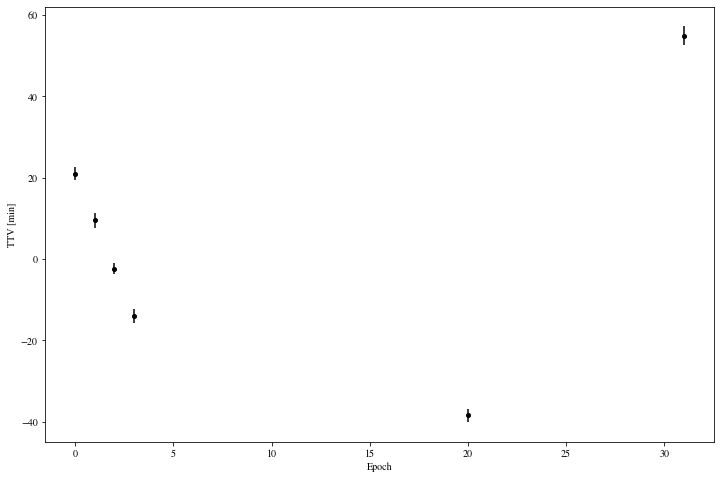

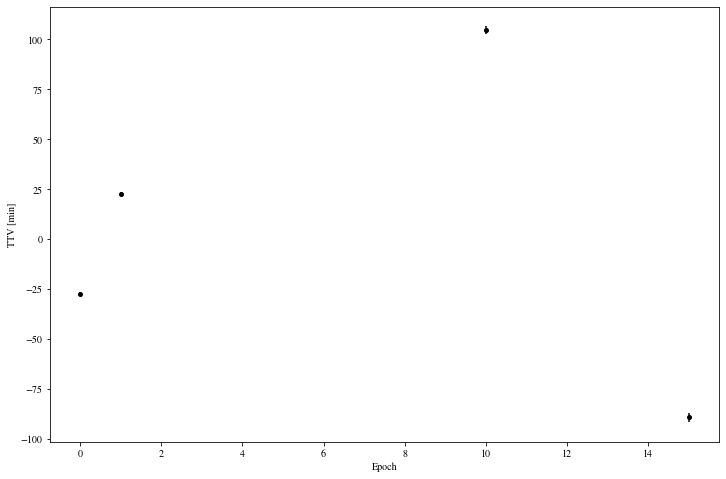

In [3]:
ttvnest.plot_utils.plot_ttv_data(k2_24)

Let's retrieve:

In [4]:
results = k2_24.retrieve(walks = 100, bound = 'multi', nlive = 10000, wt_kwargs={'pfrac': 1.0})

203725it [11:04:34,  3.29it/s, batch: 0 | bound: 164 | nc: 100 | ncall: 17063528 | eff(%):  1.193 | loglstar:   -inf < -88.269 <    inf | logz: -112.418 +/-    nan | dlogz: 140.564 >  0.010]    /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
211674it [11:36:45,  1.13it/s, batch: 0 | bound: 172 | nc: 1253 | ncall: 17881289 | eff(%):  1.183 | loglstar:   -inf < -57.224 <    inf | logz: -81.972 +/-    nan | dlogz: 111.546 >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
213718it [11:45:23,  1.21it/s, batch: 0 | bound: 174 | nc: 548 | ncall: 18101379 | eff(%):  1.180 | loglstar:   -inf < -50.335 <    inf | logz: -75.215 +/-  

254014it [14:52:42,  2.83s/it, batch: 0 | bound: 216 | nc: 3206 | ncall: 22654924 | eff(%):  1.121 | loglstar:   -inf < 26.129 <    inf | logz: -1.419 +/-    nan | dlogz: 32.297 >  0.010]/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
254027it [14:54:00,  1.16s/it, batch: 0 | bound: 216 | nc: 142 | ncall: 22683068 | eff(%):  1.119 | loglstar:   -inf < 26.138 <    inf | logz: -1.408 +/-    nan | dlogz: 32.284 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
256923it [15:09:40,  3.94it/s, batch: 0 | bound: 218 | nc: 100 | ncall: 23001658 | eff(%):  1.116 | loglstar:   -inf < 28.793 <    inf | logz:  1.017 +/-    na

282025it [17:52:50,  4.31it/s, batch: 0 | bound: 250 | nc: 100 | ncall: 26370733 | eff(%):  1.069 | loglstar:   -inf < 44.379 <    inf | logz: 14.901 +/-    nan | dlogz: 15.049 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
283447it [18:00:43,  4.27it/s, batch: 0 | bound: 252 | nc: 100 | ncall: 26575935 | eff(%):  1.066 | loglstar:   -inf < 44.966 <    inf | logz: 15.398 +/-    nan | dlogz: 14.410 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
285491it [18:11:45,  2.91s/it, batch: 0 | bound: 255 | nc: 2991 | ncall: 26837029 | eff(%):  1.063 | loglstar:   -inf < 45.754 <    inf | logz: 16.062 +/-    nan | dl

308599it [20:51:10,  5.87s/it, batch: 0 | bound: 287 | nc: 8272 | ncall: 30213872 | eff(%):  1.021 | loglstar:   -inf < 52.050 <    inf | logz: 20.929 +/-    nan | dlogz:  6.365 >  0.010]/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
309734it [20:59:09,  4.08it/s, batch: 0 | bound: 288 | nc: 100 | ncall: 30405510 | eff(%):  1.018 | loglstar:   -inf < 52.265 <    inf | logz: 21.074 +/-    nan | dlogz:  6.107 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
311207it [21:12:06,  3.65it/s, batch: 0 | bound: 290 | nc: 100 | ncall: 30687994 | eff(%):  1.014 | loglstar:   -inf < 52.535 <    inf | logz: 21.252 +/-    na

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
332502it [23:36:56,  4.30it/s, batch: 0 | bound: 320 | nc: 100 | ncall: 34177702 | eff(%):  0.973 | loglstar:   -inf < 55.327 <    inf | logz: 22.875 +/-    nan | dlogz:  2.492 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
333738it [23:45:55,  4.29it/s, batch: 0 | bound: 322 | nc: 100 | ncall: 34411194 | eff(%):  0.970 | loglstar:   -inf < 55.442 <    inf | logz: 22.929 +/-    nan | dlogz:  2.331 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-fac

348891it [25:39:46,  3.63it/s, batch: 0 | bound: 345 | nc: 100 | ncall: 37101019 | eff(%):  0.940 | loglstar:   -inf < 56.543 <    inf | logz: 23.368 +/-    nan | dlogz:  0.852 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
349682it [25:45:04,  3.83it/s, batch: 0 | bound: 346 | nc: 100 | ncall: 37211494 | eff(%):  0.939 | loglstar:   -inf < 56.590 <    inf | logz: 23.382 +/-    nan | dlogz:  0.800 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
350189it [25:47:49,  4.07it/s, batch: 0 | bound: 346 | nc: 100 | ncall: 37277164 | eff(%):  0.939 | loglstar:   -inf < 56.618 <    inf | logz: 23.390 +/-    nan | dlo

372494it [28:27:35,  4.11it/s, batch: 0 | bound: 377 | nc: 100 | ncall: 41087871 | eff(%):  0.906 | loglstar:   -inf < 57.546 <    inf | logz: 23.588 +/-    nan | dlogz:  0.097 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
373813it [28:38:20,  3.63it/s, batch: 0 | bound: 379 | nc: 100 | ncall: 41346498 | eff(%):  0.904 | loglstar:   -inf < 57.585 <    inf | logz: 23.592 +/-    nan | dlogz:  0.085 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
374550it [28:45:04,  4.02it/s, batch: 0 | bound: 381 | nc: 100 | ncall: 41510302 | eff(%):  0.902 | loglstar:   -inf < 57.605 <    inf | logz: 23.595 +/-    nan | dl

391355it [30:55:06,  3.93it/s, batch: 0 | bound: 407 | nc: 100 | ncall: 44640603 | eff(%):  0.876 | loglstar:   -inf < 57.994 <    inf | logz: 23.625 +/-    nan | dlogz:  0.017 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
392760it [31:06:48,  4.09it/s, batch: 0 | bound: 409 | nc: 100 | ncall: 44923230 | eff(%):  0.874 | loglstar:   -inf < 58.019 <    inf | logz: 23.626 +/-    nan | dlogz:  0.014 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor 

Let's check out our results. They won't be exactly the same as what Erik got in 2018 because that paper is a joint TTV+RV paper (where the TTVs are analytic). But, we should get somewhere reasonably close -- he got 53.3 and 43.4 ppm for the dynamical masses of planets b and c respectively. In our units (referenced to 3 ppm for Earth/Sun), we should expect something like 17.8 and 14.5.

Let's see if we got there...

In [10]:
k2_24.posterior_summary()
ttvnest.plot_utils.plot_results(k2_24, uncertainty_curves = 100, 
                                sim_length = 365.25*100, outname = 'k2_24_rvprior_100yr')

Summary (middle 95 percentile): 
$M_1/M_\star/3\times10^{-6}$: $18.300429^{+3.415101}_{-3.984473}$
$P_1\ [\mathrm{days}]$: $20.882648^{+0.002237}_{-0.001645}$
$\sqrt{e}_1\cos(\omega_1)$: $0.206894^{+0.216221}_{-0.514025}$
$\sqrt{e}_1\sin(\omega_1)$: $-0.131415^{+0.308467}_{-0.32126}$
$T_{0,1}\ [\mathrm{days}]$: $2.795165^{+0.001477}_{-0.001748}$
$M_2/M_\star/3\times10^{-6}$: $14.433795^{+3.373654}_{-3.347795}$
$P_2\ [\mathrm{days}]$: $42.374582^{+0.004299}_{-0.007406}$
$\sqrt{e}_2\cos(\omega_2)$: $0.153924^{+0.21311}_{-0.391581}$
$\sqrt{e}_2\sin(\omega_2)$: $0.055704^{+0.351523}_{-0.428196}$
$T_{0,2}\ [\mathrm{days}]$: $12.625367^{+0.001184}_{-0.001152}$


I'd say that's pretty solid! Let's make the dynesty plots for good measure:

In [6]:
ttvnest.plot_utils.dynesty_plots(k2_24, outname = 'k2_24_rvprior')

['k2_24_rvprior_cornerplot.png',
 'k2_24_rvprior_traceplot.png',
 'k2_24_rvprior_runplot.png']

Great! Let's save our results for later:

In [7]:
ttvnest.io_utils.save_results(k2_24, 'k2_24_rvprior.p')

'k2_24_rvprior.p'